# Perceptron
<hr>

**Objectives:**
<br>

- To illustrate simple perceptron model
- To run a simple linear perceptron model
- To run a perceptron using a real world dataset

<br>
<hr>


In [ ]:
# simple perceptron
# x1 = weather, x2 = company, x3 = proximity

w1 = 4
w2 = 2
w3 = 2

x1 = float(input("enter input for x1: "))
x2 = float(input("enter input for x2: "))
x3 = float(input("enter input for x3: "))
b = -5

z = x1*w1 + x2*w2 + x3*w3 + b
print(z)
if z <= 0:
  print("No, I will not go to the movie")
else:
  print("Yes, I will go to the movie")

enter input for x1: 0.75
enter input for x2: 0.75
enter input for x3: 0.5
0.5
Yes, I will not go to the movie


In [ ]:
# perceptron as linear classifier

w1 = -2
w2 = -2

x1 = float(input("enter input for x1: "))
x2 = float(input("enter input for x2: "))
z = -2*x1 -2*x2 + 3
print(z)
if z > 0:
  print(1)
else:
  print(0)


enter input for x1: 0
enter input for x2: 0
3.0
1


# Perceptron Algorithm

Perceptron receives input signals from examples of training data that we weight and combined in a linear equation called the activation.
~~~
activation = sum(weight_i * x_i) + bias
~~~
The activation is then transformed into an output value or prediction using a transfer function, such as the step transfer function.
```
prediction = 1.0 if activation > 0.0 else 0.0
```

In this way, the Perceptron is a classification algorithm for problems with two classes (0 and 1) where a linear equation (like or hyperplane) can be used to separate the two classes.

It is closely related to linear regression and logistic regression that make predictions in a similar way (e.g. a weighted sum of inputs).

The weights of the Perceptron algorithm must be estimated from your training data using stochastic gradient descent.

# Stochastic Gradient Descent
Gradient Descent is the process of minimizing a function by following the gradients of the cost function.

This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

In machine learning, we can use a technique that evaluates and updates the weights every iteration called stochastic gradient descent to minimize the error of a model on our training data.

The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

This procedure can be used to find the set of weights in a model that result in the smallest error for the model on the training data.

For the Perceptron algorithm, each iteration the weights (w) are updated using the equation:
```
w = w + learning_rate * (expected - predicted) * x
```
- w - weight being optimized
- learning_rate - learning rate you must configure (e.g. 0.01)
- (expected – predicted) - prediction error for the model on the training data attributed to the weight
- x - input value

### Making Predictions

Below is a function named predict() that predicts an output value for a row given a set of weights.

The first weight is always the bias as it is standalone and not responsible for a specific input value.

In [ ]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


# Training Network Weights
We can estimate the weight values for our training data using stochastic gradient descent.

Stochastic gradient descent requires two parameters:

- **Learning Rate**: Used to limit the amount each weight is corrected each time it is updated.
- **Epochs**: The number of times to run through the training data while updating the weight.

In [ ]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

# Calculate weights
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.0001
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.000, error=2.000
>epoch=1, lrate=0.000, error=1.000
>epoch=2, lrate=0.000, error=0.000
>epoch=3, lrate=0.000, error=0.000
>epoch=4, lrate=0.000, error=0.000
[-0.0001, 0.00020653640140000005, -0.0002341811771]


In [ ]:
# Perceptron Algorithm on the Sonar Dataset - UCI Machine Learning Library
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

# Test the Perceptron algorithm on the sonar dataset
seed(1)
# load and prepare data
filename = '/content/drive/MyDrive/COURSES/CPE313 - ADVANCED ML AND DL/sonar.all-data'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [76.81159420289855, 69.56521739130434, 72.46376811594203]
Mean Accuracy: 72.947%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np

# each row contains Sepal length in cm, Sepal width in nm and type (0|1)
# 0: Iris-setosa | 1: Iris-versicolor
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/DATA/iris-data.csv', delimiter=',')
data

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.9, 3. , 0. ],
       [4.6, 3.1, 0. ],
       [4.6, 3.1, 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.4, 0. ],
       [5.4, 3.9, 0. ],
       [5. , 3.6, 0. ],
       [4.7, 3.2, 0. ],
       [4.7, 3.2, 0. ],
       [5.1, 3.5, 0. ],
       [4.4, 2.9, 0. ],
       [5. , 3.4, 0. ],
       [5.4, 3.7, 0. ],
       [4.8, 3.4, 0. ],
       [4.8, 3. , 0. ],
       [5.8, 4. , 0. ],
       [4.8, 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [5.1, 3.5, 0. ],
       [5.8, 4. , 0. ],
       [4.4, 2.9, 0. ],
       [5.5, 2.3, 1. ],
       [5.4, 3.9, 0. ],
       [5.7, 3.8, 0. ],
       [5.4, 3.9, 0. ],
       [5.4, 3.9, 0. ],
       [5.4, 3.9, 0. ],
       [5.7, 4.4, 0. ],
       [4.8, 3.4, 0. ],
       [5.7, 2.8, 1. ],
       [4.7, 3.2, 0. ],
       [5.4, 3.7, 0. ],
       [4.9, 3.1, 0. ],
       [5.2, 2.7, 1. ],
       [4.8, 3.4, 0. ],
       [5.7, 2.8, 1. ],
       [4.8, 3. , 0. ],
       [6.5, 2.8, 1. ],
       [4.8, 3.4

### VISUALIZE THE DATA
It is a good idea to visualize the data so we can confirm that the data is linearly separable.

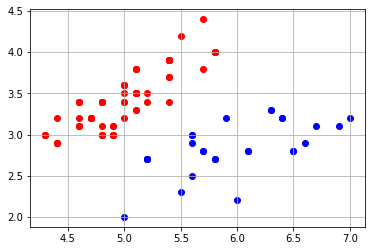

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()

for i in range(len(data)) :
    point = data[i]
    if point[2] == 0 :
        color = 'r'  # setosas will appear in blue
    else:
        color = 'b'  # versicolor will appear in red

    plt.scatter(point[0], point[1], c=color);

In [ ]:
# DEFINE TRAINING AND TESTING SETS
from sklearn.model_selection import train_test_split

target = data[:, -1]
data = data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.30, random_state=42)

X_train.shape

(68, 2)

In [ ]:
# TRAIN THE MODEL
from sklearn.metrics import mean_squared_error

np.random.seed(93)

class Perceptron(object):
    def __init__(self, learning=0.01, n_epochs=20):
        self.learning = learning
        self.n_epochs = n_epochs

    def predict(self, X):
        pred = np.dot(X, self.w_) + self.b_
        return 1.0 if pred >= 0.0 else 0.0

    def fit(self, X, y):
        # iniciate the weights and bias
        self.w_ = np.random.uniform(0, 1, X.shape[1])
        self.b_ = np.random.uniform(0, 1, 1)

        self.costList_ = []

        for ep in range(self.n_epochs):
            cost_epoch = 0
            for xi, target in zip(X, y):
                # cost function
                pred = self.predict(xi)
                cost = np.square(target - pred)
                cost_epoch += float(cost/len(X))  # MSE

                # update weights and bias
                update = self.learning * (target - pred)
                self.w_ += update * xi
                self.b_ += update

            # store MSE through every epoch iteration
            self.costList_.append(cost_epoch)

            # print model improvements
            print("Epoch: {:04}\tLoss: {:06.5f}".format((ep+1), cost_epoch), end='')
            print("\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w_[0],
                                                                      self.w_[1],
                                                                      float(self.b_)))
        return self

In [ ]:
# EXECUTE THE MODEL
clf = Perceptron()
clf.fit(X_train, y_train)

Epoch: 0001	Loss: 0.58824		Regression: -0.08(X1) + 0.03(X2) + 0.15
Epoch: 0002	Loss: 0.39706		Regression: -0.02(X1) + -0.09(X2) + 0.14
Epoch: 0003	Loss: 0.32353		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0004	Loss: 0.02941		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0005	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0006	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0007	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0008	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0009	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0010	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0011	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0012	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0013	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0014	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0015	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) +

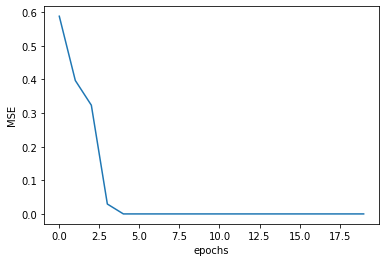

In [ ]:
# VISUALIZE MODEL IMPROVEMENT
plt.plot(clf.costList_)
plt.xlabel('epochs')
plt.ylabel('MSE');
plt.show()

computing confusion matrix on training sets..


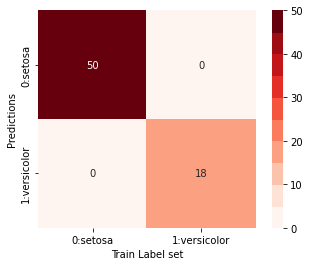

computing confusion matrix on testing sets..


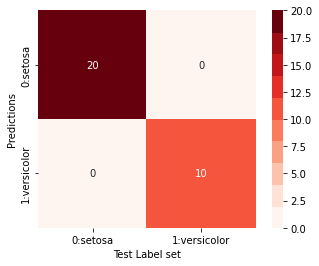

In [ ]:
# VISUALIZE CONFUSION MATRIX
import seaborn as sns
from sklearn.metrics import confusion_matrix

# this will make the plot better-looking
cmap = cmap=plt.cm.get_cmap('Reds', 10)

# create a confusion matrix for training set
print('computing confusion matrix on training sets..')
matrix_labels = ['0:setosa', '1:versicolor']
train_predictions = [clf.predict(item) for item in X_train]
mat = confusion_matrix(y_train, train_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=True, xticklabels=matrix_labels,
            yticklabels=matrix_labels, cmap=cmap)

plt.xlabel('Train Label set')
plt.ylabel('Predictions')
plt.show()

# create a confusion matrix for testing set
print('computing confusion matrix on testing sets..')
matrix_labels = ['0:setosa', '1:versicolor']
test_predictions = [clf.predict(item) for item in X_test]
mat = confusion_matrix(y_test, test_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=True, xticklabels=matrix_labels,
            yticklabels=matrix_labels, cmap=cmap)

plt.xlabel('Test Label set')
plt.ylabel('Predictions')
plt.show()

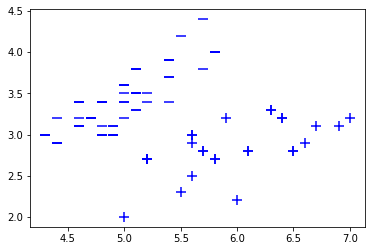

expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0


In [ ]:
# COMPARING EVERY SINGLE RESULT
for i, point in enumerate(data):
    # Plot the samples with labels = 0
    out = clf.predict(point)
    if out==0:
        plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2, color='blue')
    # Plot the samples with labels = 1
    else:
        plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2, color='blue')
plt.show()

for i in range(len(y_test)):
    print('expectedValue vs prediction:\t {} | {}'.format(y_test[i], clf.predict(X_test[i])))

In [ ]:
# Test the prediction
petal_length = 4.5
petal_width = 4.3

# 0: Iris-setosa | 1: Iris-versicolor
print('Iris-versicolor' if clf.predict([petal_length, petal_width]) else 'Iris-setosa')

Iris-setosa
